<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Школа-глубокого-обучения-ФПМИ-МФТИ" data-toc-modified-id="Школа-глубокого-обучения-ФПМИ-МФТИ-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span><b>Школа глубокого обучения ФПМИ МФТИ</b></a></span></li><li><span><a href="#Домашнее-задание.-Весна-2022" data-toc-modified-id="Домашнее-задание.-Весна-2022-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span><b>Домашнее задание. Весна 2022</b></a></span></li></ul></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Функции-потерь-и-метрика" data-toc-modified-id="Функции-потерь-и-метрика-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Функции потерь и метрика</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Метрика-IoU" data-toc-modified-id="Метрика-IoU-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Метрика IoU</a></span></li><li><span><a href="#BCE-loss" data-toc-modified-id="BCE-loss-2.0.2"><span class="toc-item-num">2.0.2&nbsp;&nbsp;</span>BCE loss</a></span></li><li><span><a href="#Dice-loss" data-toc-modified-id="Dice-loss-2.0.3"><span class="toc-item-num">2.0.3&nbsp;&nbsp;</span>Dice loss</a></span></li><li><span><a href="#Focal-loss" data-toc-modified-id="Focal-loss-2.0.4"><span class="toc-item-num">2.0.4&nbsp;&nbsp;</span>Focal loss</a></span></li></ul></li></ul></li><li><span><a href="#Реализация-различных-архитектур" data-toc-modified-id="Реализация-различных-архитектур-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Реализация различных архитектур</a></span><ul class="toc-item"><li><span><a href="#SegNet" data-toc-modified-id="SegNet-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>SegNet</a></span></li><li><span><a href="#U-Net" data-toc-modified-id="U-Net-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>U-Net</a></span></li><li><span><a href="#Обучение-и-тестирование" data-toc-modified-id="Обучение-и-тестирование-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Обучение и тестирование</a></span><ul class="toc-item"><li><span><a href="#SegNet-+-BCE" data-toc-modified-id="SegNet-+-BCE-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>SegNet + BCE</a></span></li><li><span><a href="#SegNet-+-Dice" data-toc-modified-id="SegNet-+-Dice-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>SegNet + Dice</a></span></li><li><span><a href="#SegNet-+-Focal" data-toc-modified-id="SegNet-+-Focal-3.3.3"><span class="toc-item-num">3.3.3&nbsp;&nbsp;</span>SegNet + Focal</a></span></li><li><span><a href="#UNet-+-BCE" data-toc-modified-id="UNet-+-BCE-3.3.4"><span class="toc-item-num">3.3.4&nbsp;&nbsp;</span>UNet + BCE</a></span></li><li><span><a href="#UNet-+-Dice" data-toc-modified-id="UNet-+-Dice-3.3.5"><span class="toc-item-num">3.3.5&nbsp;&nbsp;</span>UNet + Dice</a></span></li><li><span><a href="#UNet-+-Focal" data-toc-modified-id="UNet-+-Focal-3.3.6"><span class="toc-item-num">3.3.6&nbsp;&nbsp;</span>UNet + Focal</a></span></li></ul></li></ul></li><li><span><a href="#Итоги" data-toc-modified-id="Итоги-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Итоги</a></span></li></ul></div>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Весна 2022</b></h3>

# Сегментация изображений

В этом задании предстоит решить задачу сегментации медицинских снимков.

## Подготовка данных

In [30]:
import os
from IPython.display import clear_output
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
from time import time

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import models

from skimage.io import imread
from skimage.transform import resize

rcParams['figure.figsize'] = (15,4)

In [27]:
#!wget -c https://www.dropbox.com/s/n01pfz8911vn4q1/PH2Dataset.rar

In [28]:
#!apt-get install unrar

In [29]:
#get_ipython().system_raw("unrar x /kaggle/working/PH2Dataset.rar")

In [4]:
images = []
lesions = []

root = 'PH2Dataset'

for root, dirs, files in os.walk(os.path.join(root, 'PH2 Dataset images')):
    if root.endswith('_Dermoscopic_Image'):
        images.append(imread(os.path.join(root, files[0])))
    if root.endswith('_lesion'):
        lesions.append(imread(os.path.join(root, files[0])))

Изображения имеют разные размеры. Изменим их размер на $256\times256 $ пикселей:


In [5]:
size = (256, 256)
X = [resize(x, size, mode='constant', anti_aliasing=True,) for x in images]
Y = [resize(y, size, mode='constant', anti_aliasing=False) > 0.5 for y in lesions]

In [6]:
X = np.array(X, np.float32)
Y = np.array(Y, np.float32)
print(f'Loaded {len(X)} images')

Loaded 200 images


Чтобы убедиться, что все корректно, нарисуем несколько изображений:

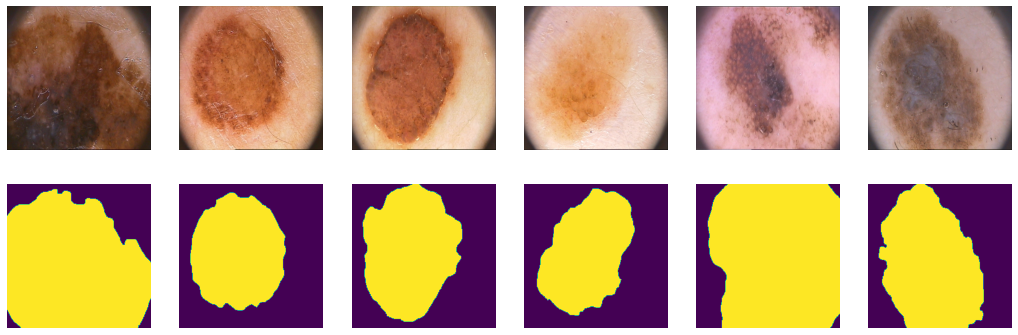

In [7]:
plt.figure(figsize=(18, 6))
for i in range(6):
    plt.subplot(2, 6, i+1)
    plt.axis("off")
    plt.imshow(X[i])

    plt.subplot(2, 6, i+7)
    plt.axis("off")
    plt.imshow(Y[i])
plt.show();

Разделим наши 200 картинок на 100/50/50
 для обучения, валидации и теста соответственно:

In [8]:
ix = np.random.choice(len(X), len(X), False)
train, val, test = np.split(ix, [100, 150])

In [9]:
batch_size = 25
data_tr = DataLoader(list(zip(np.rollaxis(X[train], 3, 1), Y[train, np.newaxis])), 
                     batch_size=batch_size, shuffle=True)
data_val = DataLoader(list(zip(np.rollaxis(X[val], 3, 1), Y[val, np.newaxis])),
                      batch_size=batch_size, shuffle=True)
data_ts = DataLoader(list(zip(np.rollaxis(X[test], 3, 1), Y[test, np.newaxis])),
                     batch_size=batch_size, shuffle=True)

In [10]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


## Функции потерь и метрика

#### Метрика IoU

В данном разделе предлагается использовать следующую метрику для оценки качества:

$I o U=\frac{\text {target } \cap \text { prediction }}{\text {target } \cup{prediction }}$

Пересечение (A ∩ B) состоит из пикселей, найденных как в маске предсказания, так и в основной маске истины, тогда как объединение (A ∪ B) просто состоит из всех пикселей, найденных либо в маске предсказания, либо в целевой маске.


Для примера посмотрим на истину (слева) и предсказание (справа):
![alt text](https://www.jeremyjordan.me/content/images/2018/05/target_prediction.png)


Тогда пересечение и объединение будет выглядеть так:

![alt text](https://www.jeremyjordan.me/content/images/2018/05/intersection_union.png)

In [11]:
def iou_pytorch(outputs: torch.Tensor, labels: torch.Tensor):
    outputs = outputs.squeeze(1).byte()
    labels = labels.squeeze(1).byte()
    SMOOTH = 1e-8
    intersection = (outputs & labels).float().sum((1, 2))
    union = (outputs | labels).float().sum((1, 2)) 
    
    iou = (intersection + SMOOTH) / (union + SMOOTH)
    
    thresholded = torch.clamp(20 * (iou - 0.5), 0, 10).ceil() / 10 
    
    return thresholded  

#### BCE loss

Не менее важным, чем построение архитектуры, является определение **оптимизатора** и **функции потерь.**

Популярным методом для бинарной сегментации является *бинарная кросс-энтропия*, которая задается следующим образом:

$$\mathcal L_{BCE}(y, \hat y) = -\sum_i \left[y_i\log\sigma(\hat y_i) + (1-y_i)\log(1-\sigma(\hat y_i))\right].$$

где $y$ это  таргет желаемого результата и $\hat y$ является выходом модели. $\sigma$ - это [*логистическая* функция](https://en.wikipedia.org/wiki/Sigmoid_function), который преобразует действительное число $\mathbb R$ в вероятность $[0,1]$.

Однако эта потеря страдает от проблем численной нестабильности. Самое главное, что $\lim_{x\rightarrow0}\log(x)=\infty$ приводит к неустойчивости в процессе оптимизации. Рекомендуется посмотреть следующее [упрощение](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits). Эта функция эквивалентна первой и не так подвержена численной неустойчивости:

$$\mathcal L_{BCE} = \hat y - y\hat y + \log\left(1+\exp(-\hat y)\right).$$

In [12]:
def bce_loss(y_real, y_pred):
    return (y_pred - y_pred * y_real + torch.log1p(torch.exp(-y_pred))).mean()

#### Dice loss

Учитывая две маски $X$ и $Y$, общая метрика для измерения расстояния между этими двумя масками задается следующим образом:

$$D(X,Y)=\frac{2|X\cap Y|}{|X|+|Y|}$$

Эта функция не является дифференцируемой, но это необходимое свойство для градиентного спуска. В данном случае мы можем приблизить его с помощью:

$$\mathcal L_D(X,Y) = 1-\frac{1}{256 \times 256} \times \sum_i\frac{2X_iY_i}{X_i+Y_i}.$$


In [13]:
def dice_loss(y_real, y_pred):
    num = (2 * y_real * y_pred).sum()
    den =  (y_real + y_pred).sum() * (256 ** 2)
    res =  1 - num/den
    return res 

#### Focal loss

Проблема с BCE loss потерей заключается в том, что она имеет тенденцию приносить пользу классу **большинства** (фоновому) по отношению к классу **меньшинства** (переднему). Поэтому обычно применяются весовые коэффициенты к каждому классу:

$$\mathcal L_{wBCE}(y, \hat y) = -\sum_i \alpha_i\left[y_i\log\sigma(\hat y_i) + (1-y_i)\log(1-\sigma(\hat y_i))\right].$$

Традиционно вес $\alpha_i$ определяется как обратная частота класса этого пикселя $i$, так что наблюдения миноритарного класса весят больше по отношению к классу большинства.

Еще одним недавним дополнением является взвешенный пиксельный вариант, которая взвешивает каждый пиксель по степени уверенности, которую мы имеем в предсказании этого пикселя.

$$\mathcal L_{focal}(y, \hat y) = -\sum_i \left[\left(1-\sigma(\hat y_i)\right)^\gamma y_i\log\sigma(\hat y_i) + (1-y_i)\log(1-\sigma(\hat y_i))\right].$$

Зафиксируем значение $\gamma=2$.


In [14]:
def focal_loss(y_real, y_pred, eps = 1e-8, gamma = 2):
    y_pred = nn.Sigmoid()(y_pred) 
    return -((1 - y_pred)**gamma * y_real * torch.log(y_pred + eps) + (1 - y_real) * torch.log(1 - y_pred + eps)).mean()

## Реализация различных архитектур
Реализуем несколько нейросетевых архитектур для решения задачи семантической сегментации. Сравним их по качеству на тесте с различными лосс функциями.

### SegNet

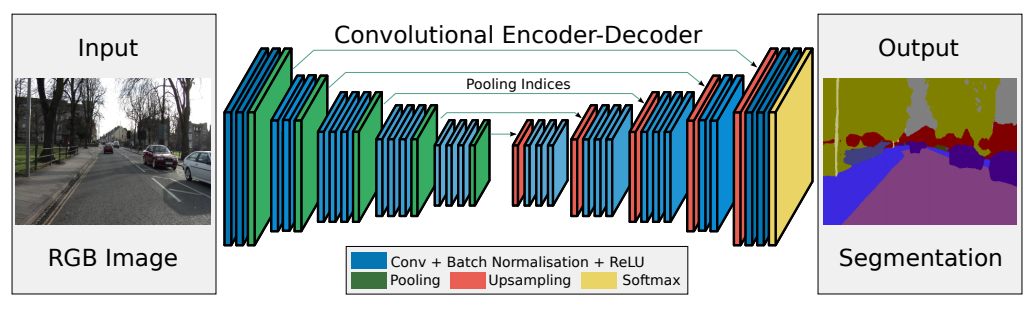

In [16]:
class SegNet(nn.Module):
    def __init__(self):
        super().__init__()

        # encoder (downsampling)
        self.enc_conv0 = nn.Sequential(
            nn.Conv2d(3, 32, 3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.Conv2d(32, 32, 3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(32)
        )
        self.pool0 = nn.MaxPool2d(2, 2, return_indices=True)
        self.enc_conv1 = nn.Sequential(
            nn.Conv2d(32, 64, 3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.Conv2d(64, 64, 3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64)
        )
        self.pool1 = nn.MaxPool2d(2, 2, return_indices=True)
        self.enc_conv2 = nn.Sequential(
            nn.Conv2d(64, 128, 3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.Conv2d(128, 128, 3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128)
        )
        self.pool2 = nn.MaxPool2d(2, 2, return_indices=True)
        self.enc_conv3 = nn.Sequential(
            nn.Conv2d(128, 256, 3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(256),
            nn.Conv2d(256, 256, 3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(256)
        )
        self.pool3 = nn.MaxPool2d(2, 2, return_indices=True)

        # bottleneck
        self.bottleneck_conv = nn.Conv2d(256, 256, 1)

        # decoder (upsampling)
        self.upsample0 =  nn.MaxUnpool2d(2, 2)
        self.dec_conv0 = nn.Sequential(
            nn.Conv2d(256, 128, 3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.Conv2d(128, 128, 3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128)
        )
        self.upsample1 = nn.MaxUnpool2d(2, 2)
        self.dec_conv1 = nn.Sequential(
            nn.Conv2d(128, 64, 3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.Conv2d(64, 64, 3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64)
        )
        self.upsample2 = nn.MaxUnpool2d(2, 2)
        self.dec_conv2 = nn.Sequential(
            nn.Conv2d(64, 32, 3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.Conv2d(32, 32, 3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(32)
        )
        self.upsample3 = nn.MaxUnpool2d(2, 2)
        self.dec_conv3 = nn.Sequential(
            nn.Conv2d(32, 32, 3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.Conv2d(32, 1, 3, padding=1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        # encoder
        e0, i0 = self.pool0(self.enc_conv0(x)) 
        e1, i1 = self.pool1(self.enc_conv1(e0)) 
        e2, i2 = self.pool2(self.enc_conv2(e1)) 
        e3, i3 = self.pool2(self.enc_conv3(e2)) 

        # bottleneck
        b = self.bottleneck_conv(e3)

        # decoder
        d0 = self.dec_conv0(self.upsample0(b, i3))
        d1 = self.dec_conv1(self.upsample1(d0, i2))
        d2 = self.dec_conv2(self.upsample2(d1, i1))
        d3 = self.dec_conv3(self.upsample2(d2, i0))
        return d3

### U-Net

[**U-Net**](https://arxiv.org/abs/1505.04597) — это архитектура нейронной сети, которая получает изображение и выводит его. Первоначально он был задуман для семантической сегментации (как мы ее будем использовать), но он настолько успешен, что с тех пор используется в других контекстах. Получая на вход медицинское изображение, он выведет изображение в оттенках серого, где интенсивность каждого пикселя зависит от вероятности того, что этот пиксель принадлежит интересующей нас области.

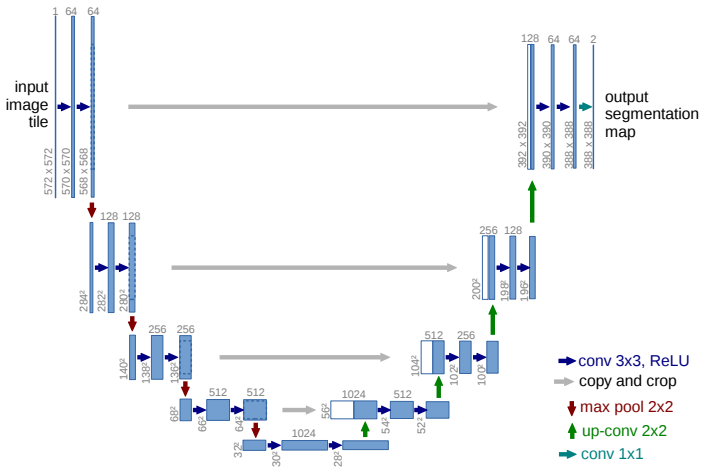

У нас в архитектуре все так же существует энкодер и декодер, как в **SegNet**, но отличительной особеностью данной модели являются *skip-connections*, соединяющие части декодера и энкодера. То есть для того чтобы передать на вход декодера тензор, мы конкатенируем симметричный выход с энкодера и выход предыдущего слоя декодера.

In [17]:
class UNet(nn.Module):
    def __init__(self):
        super().__init__()

        # encoder (downsampling)
        self.enc_conv0 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(32),
        )
        self.pool0 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.enc_conv1 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
        )
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.enc_conv2 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
        )
        self.pool2 =  nn.MaxPool2d(kernel_size=2, stride=2)
        self.enc_conv3 = nn.Sequential(
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(256),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(256)
        )
        self.pool3 =  nn.MaxPool2d(kernel_size=2, stride=2)

        # # bottleneck
        self.bottleneck_conv = nn.Sequential(
            nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(512),
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(512),
        )

        # decoder (upsampling)
        self.upsample0 = nn.ConvTranspose2d(512, 256, 2, stride=2)
        self.dec_conv0 = nn.Sequential(
            nn.Conv2d(in_channels=512, out_channels=256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(256),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(256)
        )
        self.upsample1 = nn.ConvTranspose2d(256, 128, 2, stride=2)
        self.dec_conv1 = nn.Sequential(
            nn.Conv2d(in_channels=256, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128)                                         
        )
        self.upsample2 = nn.ConvTranspose2d(128, 64, 2, stride=2)
        self.dec_conv2 = nn.Sequential(
            nn.Conv2d(in_channels=128, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64)
        )
        self.upsample3 = nn.ConvTranspose2d(64, 32, 2, stride=2)
        self.dec_conv3 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.Conv2d(in_channels=32, out_channels=1, kernel_size=3, padding=1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        # encoder
        e0 = self.enc_conv0(x)
        e0_pooled = self.pool0(e0)
        e1 = self.enc_conv1(e0_pooled)
        e1_pooled = self.pool1(e1)
        e2 = self.enc_conv2(e1_pooled)
        e2_pooled = self.pool2(e2)
        e3 = self.enc_conv3(e2_pooled)
        e3_pooled = self.pool3(e3)

        # bottleneck
        b = self.bottleneck_conv(e3_pooled)

        # decoder
        d0 = self.upsample0(b)
        d0 = torch.cat([d0, e3], dim=1)
        d0 = self.dec_conv0(d0)
        
        d1 = self.upsample1(d0)
        d1 = torch.cat([d1, e2], dim=1)
        d1 = self.dec_conv1(d1)

        d2 = self.upsample2(d1)
        d2 = torch.cat([d2, e1], dim=1)
        d2 = self.dec_conv2(d2)

        d3 = self.upsample3(d2)
        d3 = torch.cat([d3, e0], dim=1)
        d3 = self.dec_conv3(d3)
        
        return d3

### Обучение и тестирование

Мы определим цикл обучения в функции, чтобы повторно использовать его.

In [18]:
def train(model, opt, loss_fn, epochs, data_tr, data_val):
    X_val, Y_val = next(iter(data_val))
    history = {'loss':[], 'val_loss':[], 'train_score':[], 'val_score':[]} 
    for epoch in range(epochs):
        tic = time()
        print('* Epoch %d/%d' % (epoch+1, epochs))

        avg_loss = 0
        model.train()  
        for X_batch, Y_batch in data_tr:

            X_batch = X_batch.to(device)
            Y_batch = Y_batch.to(device)

            opt.zero_grad()
     
            Y_pred = model(X_batch)

            loss = loss_fn(Y_batch, Y_pred) 
            loss.backward() 
            
            opt.step()  

            avg_loss += loss
        
        avg_loss = avg_loss/len(data_tr)
        toc = time()
        print('loss: %f' % avg_loss)

        model.eval()
        Y_hat = model(X_val.to(device)).detach().cpu()
        history['loss'].append(avg_loss.detach().cpu())
        history['val_loss'].append(loss_fn(Y_val, Y_hat))
        history['train_score'].append(score_model(model, iou_pytorch, data_tr))
        history['val_score'].append(score_model(model, iou_pytorch, data_val))

        clear_output(wait=True)
        for k in range(6):
            plt.subplot(2, 6, k+1)
            plt.imshow(np.rollaxis(X_val[k].numpy(), 0, 3), cmap='gray')
            plt.title('Real')
            plt.axis('off')

            plt.subplot(2, 6, k+7)
            plt.imshow(Y_hat[k, 0], cmap='gray')
            plt.title('Output')
            plt.axis('off')
        plt.suptitle('%d / %d - loss: %f' % (epoch+1, epochs, avg_loss))
        plt.show()
    return history

In [19]:
def predict(model, data):
    model.eval()
    Y_pred = [ X_batch for X_batch, _ in data]
    return np.array(Y_pred)

In [20]:
def score_model(model, metric, data):
    model.eval()
    scores = 0
    for X_batch, Y_label in data:
        Y_pred = model(X_batch.to(device))
        scores += metric(Y_pred>0.5, Y_label.to(device)).mean().item()

    return scores/len(data)

#### SegNet + BCE

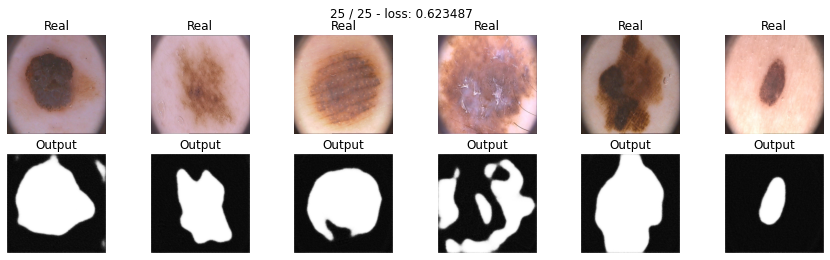

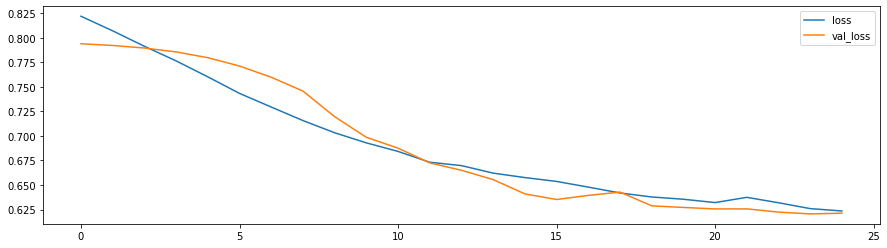

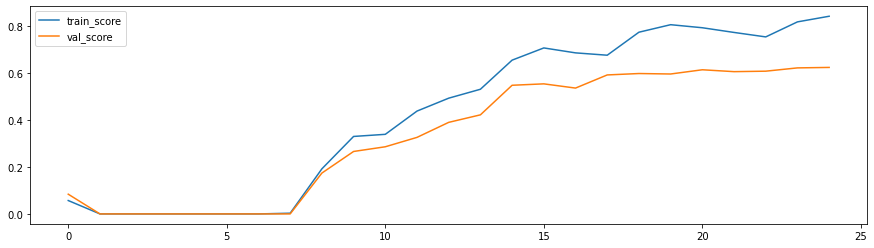

0.7220000326633453

In [21]:
model = SegNet().to(device)
max_epochs = 25
optim = torch.optim.Adam(model.parameters(), lr=0.0001)
history = train(model, optim, bce_loss, max_epochs, data_tr, data_val)

plt.plot(history['loss'], label='loss')
plt.plot(history['val_loss'], label='val_loss')
plt.legend()
plt.show()

plt.plot(history['train_score'], label='train_score')
plt.plot(history['val_score'], label='val_score')
plt.legend()
plt.show()

score_model(model, iou_pytorch, data_ts)

Из графиков видно, что после 20-ой эпохи качество модели на валидации не улучшается, а на трейне растет, а это один из признаков переобучения, следовательно да, модель переобучается.

#### SegNet + Dice

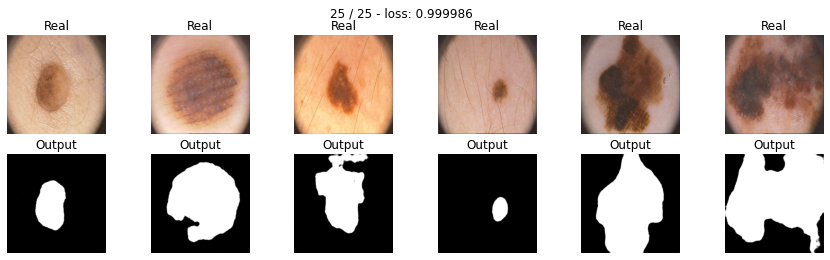

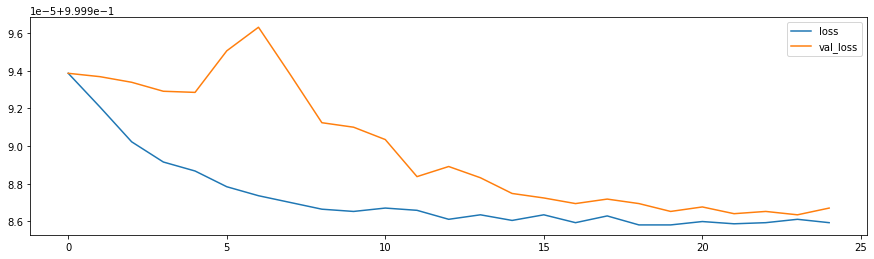

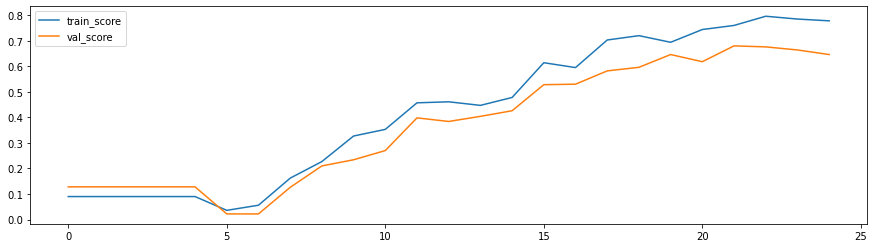

0.7080000340938568

In [22]:
model_dice = SegNet().to(device)

max_epochs = 25

optimizer = torch.optim.Adam(model_dice.parameters())

history = train(model_dice, optimizer, dice_loss, max_epochs, data_tr, data_val)

plt.plot(history['loss'], label='loss')
plt.plot(history['val_loss'], label='val_loss')
plt.legend()
plt.show()

plt.plot(history['train_score'], label='train_score')
plt.plot(history['val_score'], label='val_score')
plt.legend()
plt.show()

score_model(model_dice, iou_pytorch, data_ts)

#### SegNet + Focal

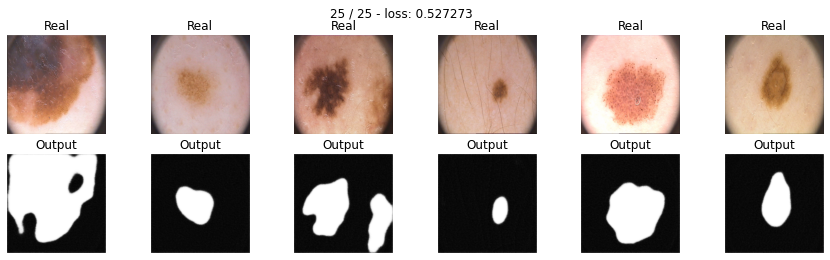

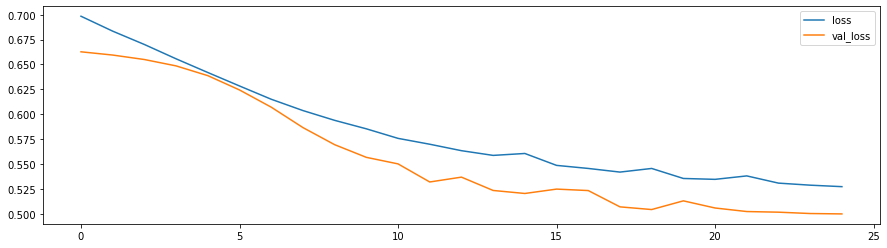

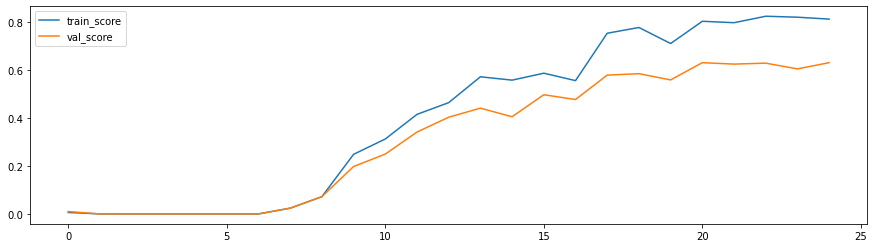

0.6840000152587891

In [23]:
model_focal = SegNet().to(device)

max_epochs = 25

optimizer = torch.optim.Adam(model_focal.parameters(), lr=0.0001)

history = train(model_focal, optimizer, focal_loss, max_epochs, data_tr, data_val)

plt.plot(history['loss'], label='loss')
plt.plot(history['val_loss'], label='val_loss')
plt.legend()
plt.show()

plt.plot(history['train_score'], label='train_score')
plt.plot(history['val_score'], label='val_score')
plt.legend()
plt.show()

score_model(model_focal, iou_pytorch, data_ts)

#### UNet + BCE

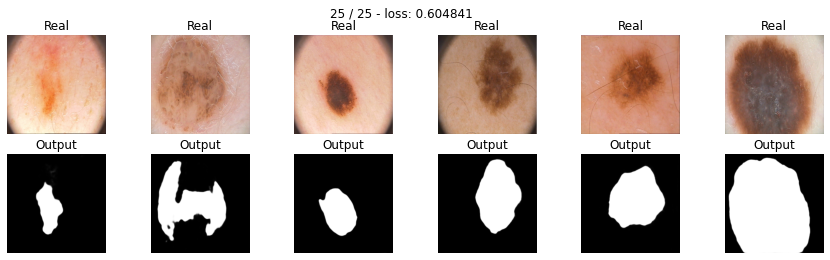

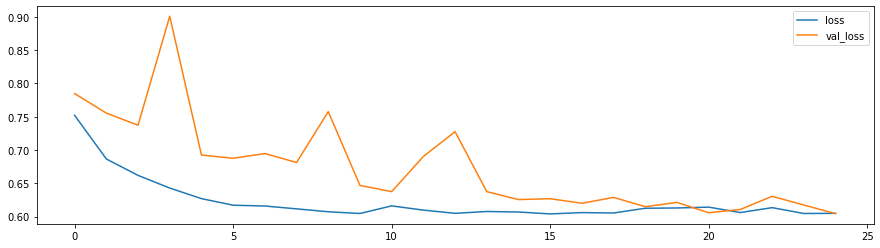

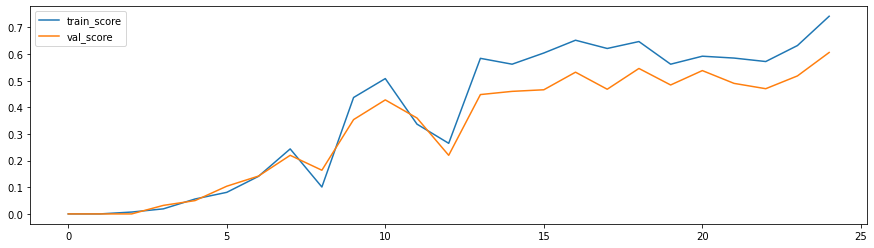

0.6900000274181366

In [24]:
unet_model = UNet().to(device)

max_epochs = 25
optimizer = torch.optim.Adam(unet_model.parameters(), lr=0.001)
history = train(unet_model, optimizer, bce_loss, max_epochs, data_tr, data_val)

plt.plot(history['loss'], label='loss')
plt.plot(history['val_loss'], label='val_loss')
plt.legend()
plt.show()

plt.plot(history['train_score'], label='train_score')
plt.plot(history['val_score'], label='val_score')
plt.legend()
plt.show()

score_model(unet_model, iou_pytorch, data_ts)

#### UNet + Dice

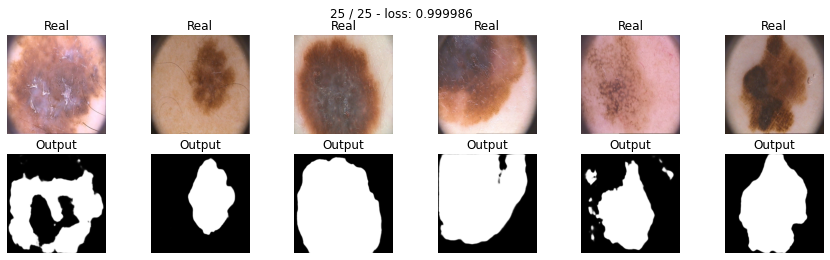

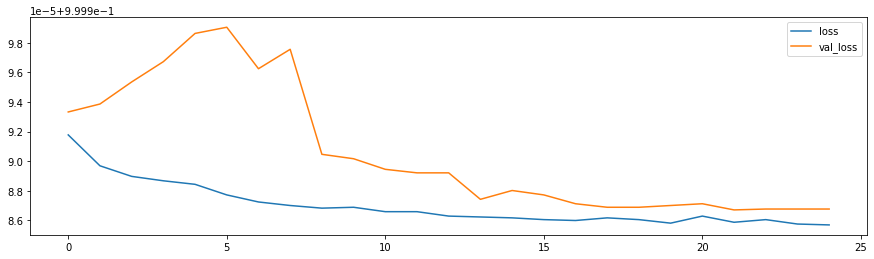

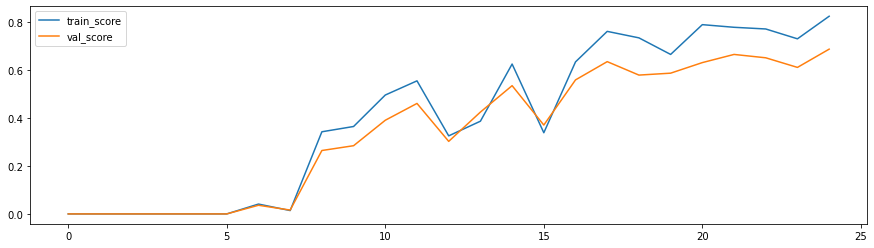

0.7739999890327454

In [25]:
unet_model = UNet().to(device)

max_epochs = 25
optimizer = torch.optim.Adam(unet_model.parameters(), lr=0.001)
history = train(unet_model, optimizer, dice_loss, max_epochs, data_tr, data_val)
plt.plot(history['loss'], label='loss')
plt.plot(history['val_loss'], label='val_loss')
plt.legend()
plt.show()

plt.plot(history['train_score'], label='train_score')
plt.plot(history['val_score'], label='val_score')
plt.legend()
plt.show()

score_model(unet_model, iou_pytorch, data_ts)

#### UNet + Focal

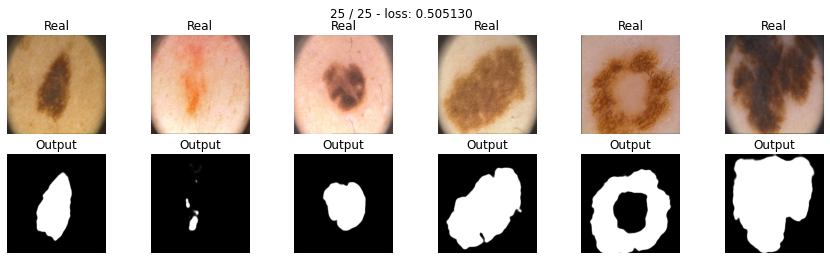

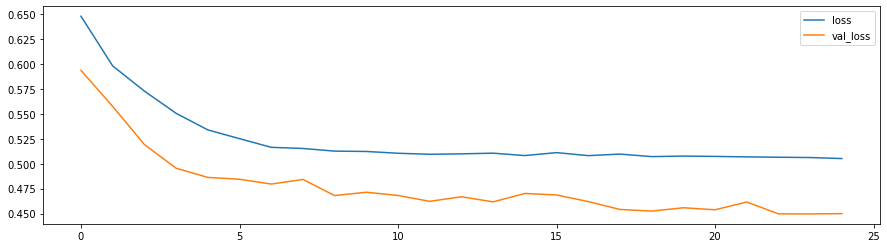

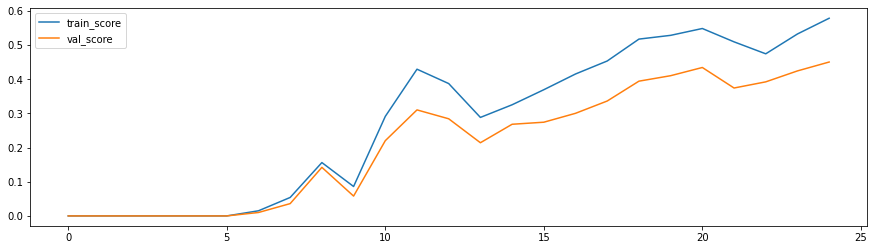

0.5499999821186066

In [26]:
unet_model = UNet().to(device)

max_epochs = 25
optimizer = torch.optim.Adam(unet_model.parameters(), lr=0.001)
history = train(unet_model, optimizer, focal_loss, max_epochs, data_tr, data_val)
plt.plot(history['loss'], label='loss')
plt.plot(history['val_loss'], label='val_loss')
plt.legend()
plt.show()

plt.plot(history['train_score'], label='train_score')
plt.plot(history['val_score'], label='val_score')
plt.legend()
plt.show()

score_model(unet_model, iou_pytorch, data_ts)

## Итоги

Исходя из полученных метрик и графиков нельзя однозначно сказать, какая из моделей лучше. Более устойчивые графики функции потерь и целевой метрики получались у SegNet. Если выбирать лучшую по получившейся метрике на тесте, то это будет UNet + Dice loss. Лучшие показатели можно получить, если реализовать EarlyStopping, увеличить число скрытых слоев и точнее подобрать lr.

Model  | test_score 
-------------------|------------------
UNet + dice | 0.774
SegNet + bce | 0.722
SegNet + dice | 0.708
UNet + bce| 0.69
SegNet + focal | 0.684
UNet + focal | 0.55